<a href="https://colab.research.google.com/github/pkro/tensorflow_cert_training/blob/main/colab_notebooks/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with neural networks in TensorFlow

Regression problem: predicting a numerical variable based on some other variation of variables

In [71]:
import tensorflow as tf
print(tf.__version__)

2.9.2


### Create data to view and fit

- features are usually defined in uppercase `X`, labels in lowercase `y`

Here we create a simple feature and label lists where the relationship is y (label) = feature (Y) + 10

Input shape: [8,] (8 numbers)
Output shape: [1,] (one number)

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# create features
# x = np.array([-7., -4., -1., 2, 5., 8., 11., 14.])
X = np.array(range(-7, 15, 3))
X

array([-7, -4, -1,  2,  5,  8, 11, 14])

In [73]:
# Create labels
y = np.array(range(3,25, 3)).astype(float)
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

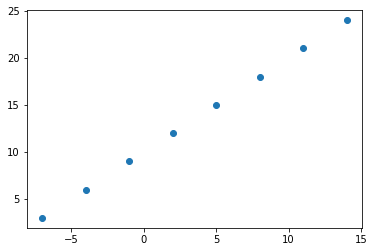

In [74]:
# Visualize
plt.scatter(X,y)

In [75]:
# this is the rule we want the neural network to learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

Create a demo tensor for house pricing prediction problem (see main readme), where we already know the input / output shape from the info graphic and try to deduce the shapes for our X, y arrays.

In [76]:
house_info = tf.constant([3, 2, 1]) # 3 bedrooms, 2 bathrooms, 1 garage
house_price = tf.constant([939700])

house_info, house_price


(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 2, 1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

The house info contains just one item of shape 3, our `X` contains 8 of shape 1 (just one number), as does the desired output.

So the input shape is 1, as is the output shape for our simple example (that we have 8 items in those arrays doesn't matter for the input / output shape!)


In [77]:
print(X[0], "should predict", y[0])
print(X[1], "should predict", y[1])
print("etc...")

-7 should predict 3.0
-4 should predict 6.0
etc...


In [78]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape, X[0].ndim

((), (), 0)

Why is there no shape?

Scalars (single numbers) are a rank 0 tensor (0 dimensions).

In the following code, we need to expand the dimensions of the input vector when fitting a model (automatic in TensorFlow up to 2.6, manual from 2.7 onward) to avoid a `shape error`:

```
## OLD
# Fit the model
model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
 
## New
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated 
```

In [79]:
# turn arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [80]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape, X[0].ndim

(TensorShape([]), TensorShape([]), 0)

### Steps in modelling with TensorFlow

1. Creationg a model - define the input and output layers, as well as the hidden layers of a deep learning model
2. Compiling a model
  - define the loss function (the function which tells the model how wrong it is) 
  - the optimizer (tells the model how to improve the patterns it is learning) 
  -evaluation metrics (what we can use to interpret the performance of the model)
3. Fitting a model - let the model try to find patterns between X and y (features and labels)

![steps in modeling with tensorflow](https://github.com/pkro/tensorflow_cert_training/blob/main/readme_images/tensorflow_modeling_steps.png?raw=1)

In [85]:
tf.random.set_seed(42)

# 1. Create a model using the sequential API
# layers can also be added with 
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1)) 
# instead of passing them as an array
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # "1" because we want to predict 1 number
])


# 2. compile the model 
model.compile(
    # or .mean_absolute_error, Computes the mean absolute error between labels and predictions.
    # loss = mean(abs(y_true - y_pred), axis=-1)
    # where y_true is the correct value, y_pred the prediction the model makes
    # "on average, how wrong were our predictions"
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent;
    metrics=["mae"] # most functions can be passed as string, e.g. optimizer="sgd"
  )

# 3. Fit the model
# Sequential groups a linear stack of layers into a tf.keras.Model.
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # 5 "laps"



Epoch 1/5
1/1 [==============================] - 1s 707ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [86]:
print(X, y)
model.predict([17.]) # SHOULD be 27.0

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float32) tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32)
1/1 [==============================] - 0s 51ms/step


array([[12.716021]], dtype=float32)

That's a pretty bad prediction.

### Improving a model with Tensorflow 1

We can try to improve a model on each of the 5 steps. The best would be to have more training data.

1. **Creating a model** - add more layers, increase number of hidden units (aka neurons) within each layer, change the [activation function](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/) of each layer.
2. **Compiling a model** - change optimization function or **learning rate** of the optimization function
3. **Fitting the model** - more epochs, give more data


Do small singular changes in experiments to see what causes a model to perform better (or *worse*!)

In [100]:
# add more layers, more neurons and an activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    # Adam is a common and useful optimizer, often the default
    # the higher the learning rate, the quicker the optimizer pushes
    # the model to improve
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
  )

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0) # more epochs (skip output)

In [101]:
model.predict([17.])

1/1 [==============================] - 0s 57ms/step


array([[29.46142]], dtype=float32)